# Image distortions at first order

Circular sources are mapped into elliptical sources. We can build a toy model to show this. Let's use a Sersic model to represent the surface brightness of our source:
$$
I(r)\sim\exp{\left[-b(n)\left(\frac{r}{r_e}\right)^{1/n}-1\right]}
$$

Lens mapping at first order implies that we are mapping from one plane to the other using the equations:

$$
\beta_1 = A_{11}\theta_1 + A_{12}\theta_2
$$
$$
\beta_2 = A_{22}\theta_2 + A_{12}\theta_1
$$


/Users/massimo/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


/Users/massimo/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


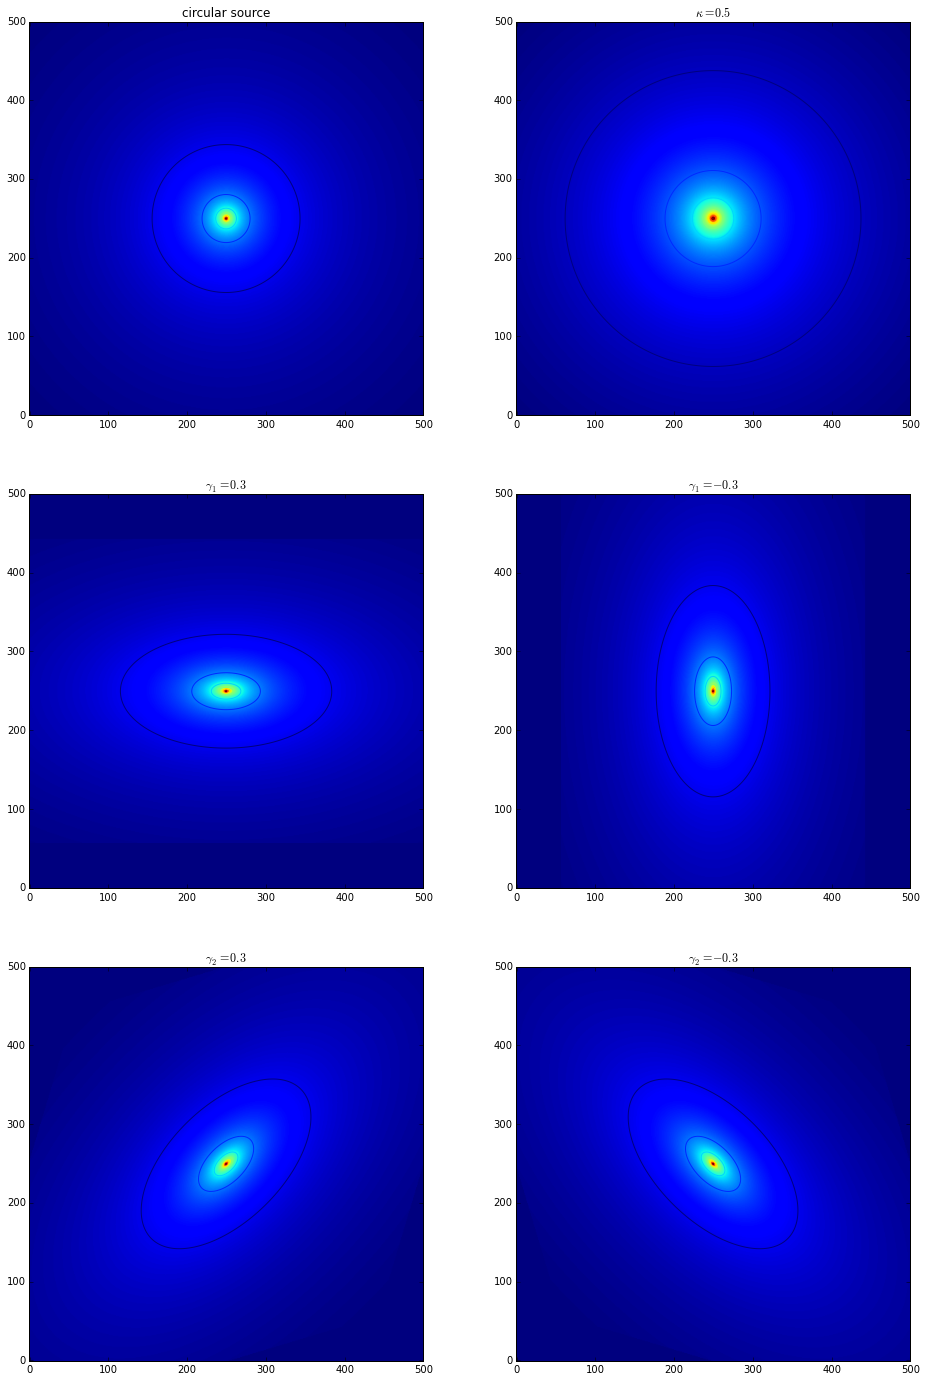

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import galflex


# build a circular reference galaxy with a Sersic profile
gal1 = galflex.Sersic(3.0, 4, N=500, flux=10.0, q=1.0, phi=0.0, cx=0.0,cy=0.0, re=60.0)

# build another identical galaxy with which we will play

gal = galflex.Sersic(3.0, 4, N=500, flux=10.0, q=1.0, phi=0.0, cx=0.0,cy=0.0, re=60.0)

gal.lens(kap=0.5, gamma1=0.0, gamma2=0.0)

fig,ax=plt.subplots(3,2,figsize=(16,24))
ax[0,0].imshow(gal1.image,origin='lower')
ax[0,0].contour(gal1.image)
ax[0,0].set_title('circular source')
ax[0,1].imshow(gal.image,origin='lower')
ax[0,1].contour(gal.image)
ax[0,1].set_title('$\kappa=0.5$')

gal = galflex.Sersic(3.0, 4, N=500, flux=10.0, q=1.0, phi=0.0, cx=0.0,cy=0.0, re=60.0)
gal.lens(kap=0.0, gamma1=0.3, gamma2=0.0)
ax[1,0].imshow(gal.image,origin='lower')
ax[1,0].contour(gal.image)
ax[1,0].set_title('$\gamma_1=0.3$')

gal = galflex.Sersic(3.0, 4, N=500, flux=10.0, q=1.0, phi=0.0, cx=0.0,cy=0.0, re=60.0)
gal.lens(kap=0.0, gamma1=-0.3, gamma2=0.0)
ax[1,1].imshow(gal.image,origin='lower')
ax[1,1].contour(gal.image)
ax[1,1].set_title('$\gamma_1=-0.3$')

gal = galflex.Sersic(3.0, 4, N=500, flux=10.0, q=1.0, phi=0.0, cx=0.0,cy=0.0, re=60.0)
gal.lens(kap=0.0, gamma1=0.0, gamma2=0.3)
ax[2,0].imshow(gal.image,origin='lower')
ax[2,0].contour(gal.image)
ax[2,0].set_title('$\gamma_2=0.3$')

gal = galflex.Sersic(3.0, 4, N=500, flux=10.0, q=1.0, phi=0.0, cx=0.0,cy=0.0, re=60.0)
gal.lens(kap=0.0, gamma1=0.0, gamma2=-0.3)
ax[2,1].imshow(gal.image,origin='lower')
ax[2,1].contour(gal.image)
ax[2,1].set_title('$\gamma_2=-0.3$')

# Critical lines

Critical lines are defined by the equations
$$ \lambda_t=1-\kappa-\gamma=0$$
and
$$ \lambda_r=1-\kappa+\gamma=0$$
where $\gamma=(\gamma_1^2+\gamma_2^2)^{1/2}$.

Since the $\lambda_t$ and $\lambda_r$ are the eigenvalues of the lensing Jacobian, they can be visualized as the zero-level countours of the $\det A$ map.

0.00193584939314 3.081e-05


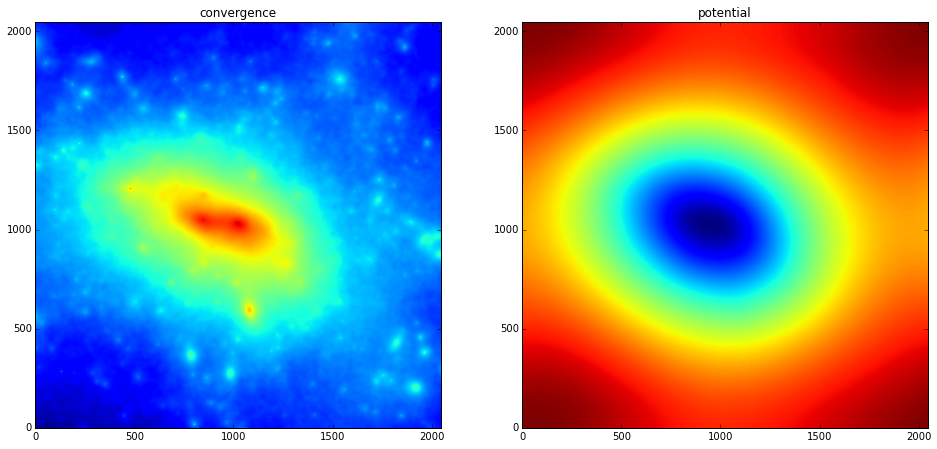

In [2]:
import numpy as np
from astropy.io import fits as pyfits
#from ..utils.fft import NUMPYFFTPack
#fftengine = NUMPYFFTPack()
import numpy.fft as fftengine
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, PowerNorm, SymLogNorm
%matplotlib inline

def potential(kappa,resolution):

    l = np.array(np.meshgrid(fftengine.rfftfreq(kappa.shape[0]),fftengine.fftfreq(kappa.shape[1])))


    #Compute the magnitude squared of the wavenumber (laplacian in Fourier space = -4*pi*l_squared)
    l_squared = l[0]**2 + l[1]**2
    l_squared[0,0] = 1.0

    #Go with the FFTs

    density_ft = fftengine.rfft2(kappa)

    #Invert the laplacian
    density_ft *= -2.0*(resolution)**2 / (l_squared * ((2.0*np.pi)**2))
    density_ft[0,0] = 0.0

    potential=fftengine.irfft2(density_ft) #if resolution is in rad, this is rad**2
    return potential
    
filekappa='/Users/massimo/stiva/FF/Hera/g0016649_G/yz_nocircles/kappa_2.fits'
kappa,header=pyfits.getdata(filekappa,header=True)

resolution=header["CDELT2"]*3600.0*np.pi/180.0
print resolution,header["CDELT2"]

pot=potential(kappa,resolution)

fig,ax = plt.subplots(1,2,figsize=(16,8))
ax[0].imshow(kappa,origin="lower",norm=LogNorm())
ax[0].set_title('convergence')
ax[1].imshow(pot,origin="lower")
ax[1].set_title('potential')

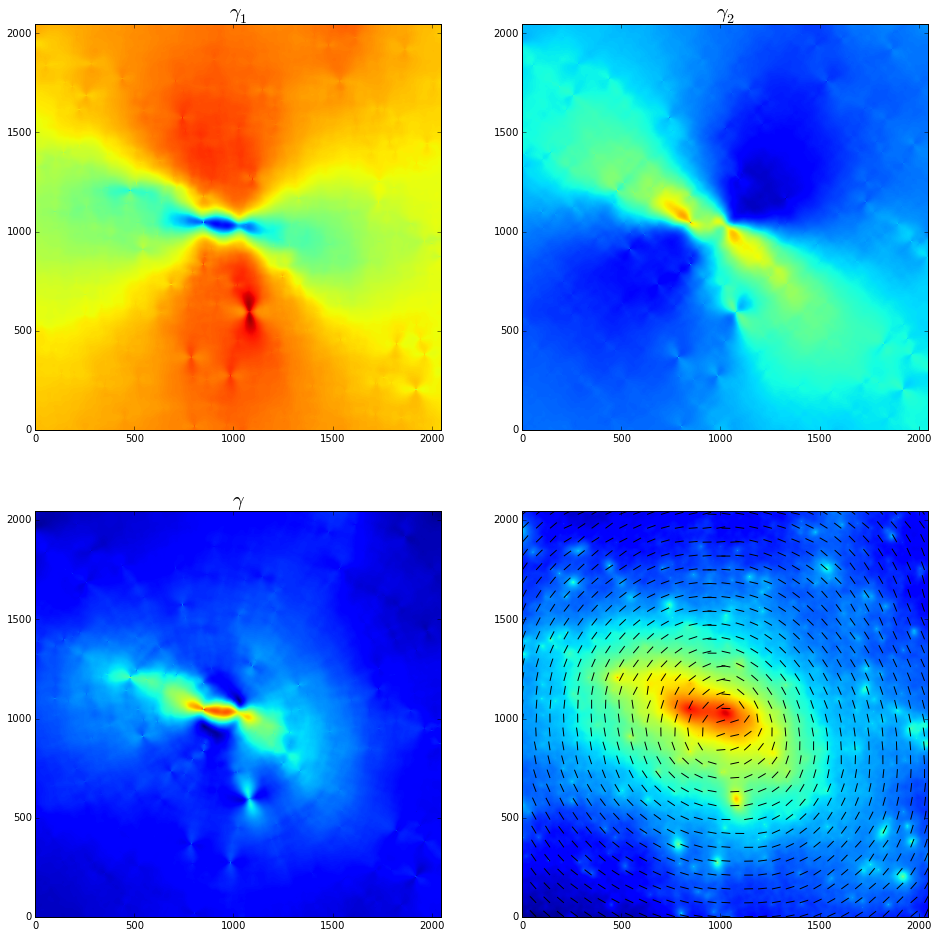

In [3]:
filegamma1='/Users/massimo/stiva/FF/Hera/g0016649_G/yz_nocircles/gammax_2.fits'
filegamma2='/Users/massimo/stiva/FF/Hera/g0016649_G/yz_nocircles/gammay_2.fits'
gamma1,header1=pyfits.getdata(filegamma1,header=True)
gamma2,header2=pyfits.getdata(filegamma2,header=True)
gamma=np.sqrt(gamma1*gamma1+gamma2*gamma2)

fig,ax = plt.subplots(2,2,figsize=(16,16))
ax[0,0].imshow(gamma1,origin='lower')
ax[0,0].set_title('$\gamma_1$',fontsize=20)
ax[0,1].imshow(gamma2,origin='lower')
ax[0,1].set_title('$\gamma_2$',fontsize=20)
ax[1,0].imshow(gamma,origin='lower')
ax[1,0].set_title('$\gamma$',fontsize=20)
ax[1,1].imshow(kappa,origin='lower',norm=LogNorm())

#shear pattern
pixel_step=70
x,y = np.meshgrid(np.arange(0,gamma.shape[1],pixel_step),np.arange(0,gamma.shape[0],pixel_step))

#Translate shear components into sines and cosines
cos_2_phi = -gamma1 / np.sqrt(gamma1**2 + gamma2**2)
sin_2_phi = gamma2 / np.sqrt(gamma1**2 + gamma2**2)

#Compute stick directions
cos_phi = np.sqrt(0.5*(1.0 + cos_2_phi)) * np.sign(sin_2_phi)
sin_phi = np.sqrt(0.5*(1.0 - cos_2_phi))

#Fix ambiguity when sin_2_phi = 0
cos_phi[sin_2_phi==0] = np.sqrt(0.5*(1.0 + cos_2_phi[sin_2_phi==0]))

#ax[1,0].quiver(x,y,cos_phi[x,y],sin_phi[x,y],headwidth=0,units="height",scale=x.shape[0],color="white")

ax[1,1].quiver(x,y,cos_phi[x,y],sin_phi[x,y],headwidth=0,units="height",scale=x.shape[0],color="black")

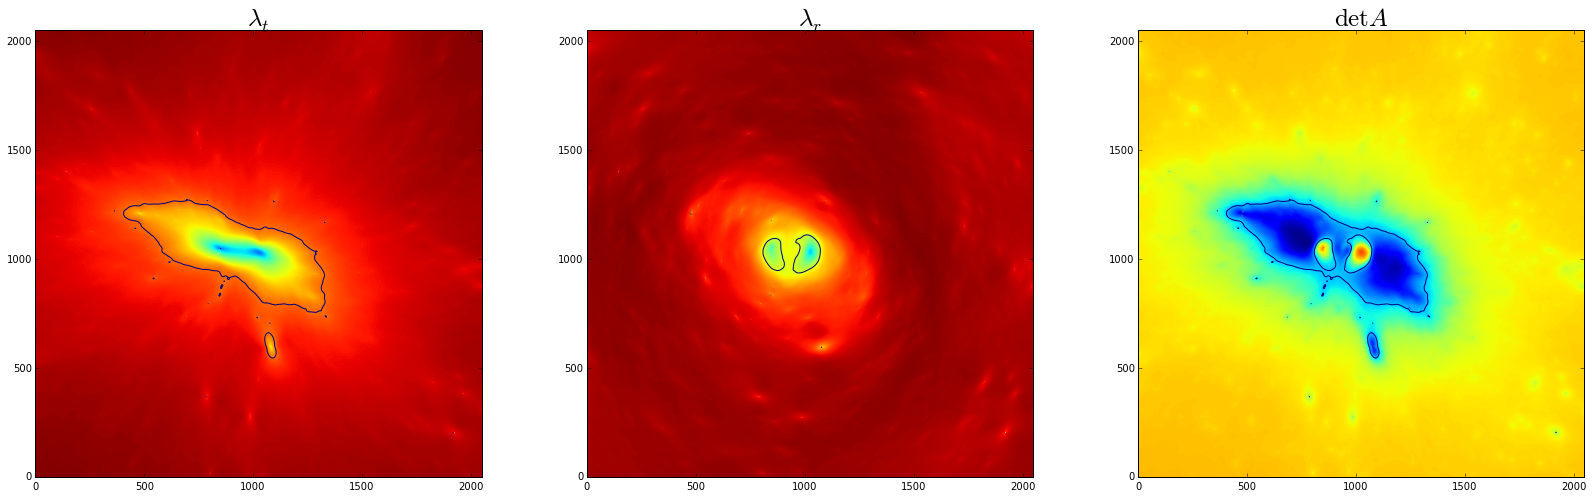

In [4]:
detA=(1.0-kappa-gamma)*(1.0-kappa+gamma)
lambdat=1.0-kappa-gamma
lambdar=1.0-kappa+gamma

fig,ax=plt.subplots(1,3,figsize=(28,8))
ax[0].imshow(lambdat,origin='lower')
ax[0].contour(lambdat,levels=[0.0])
ax[0].set_title('$\lambda_t$',fontsize=25)
ax[1].imshow(lambdar,origin='lower')
ax[1].contour(lambdar,levels=[0.0])
ax[1].set_title('$\lambda_r$',fontsize=25)
ax[2].imshow(detA,origin='lower',norm=SymLogNorm(0.3))
ax[2].contour(detA,levels=[0.0])
ax[2].set_title('$\det A$',fontsize=25)

# Critical lines vs source redshift

We have seen that 
$$ \hat\Psi=\frac{D_{LS}}{D_L D_S}\frac{2}{c^2}\int\Phi dz$$

We have seen also that  
$$\kappa,\gamma=f(\hat\Psi_{ij})$$

Since each derivative brings in a factor $D_L$, we have that

$$\kappa,\gamma \propto \frac{D_{LS}D_L}{D_S} \propto D_{lens}$$

This scaling of $\kappa$ and $\gamma$ with distances implies that a given lens has critical lines for each source redshift.

The maps above are normalized to a source redshift $z_S= 9.0$. The lens is at redshift $z_L=0.5$. 

<matplotlib.contour.QuadContourSet instance at 0x12667c440>

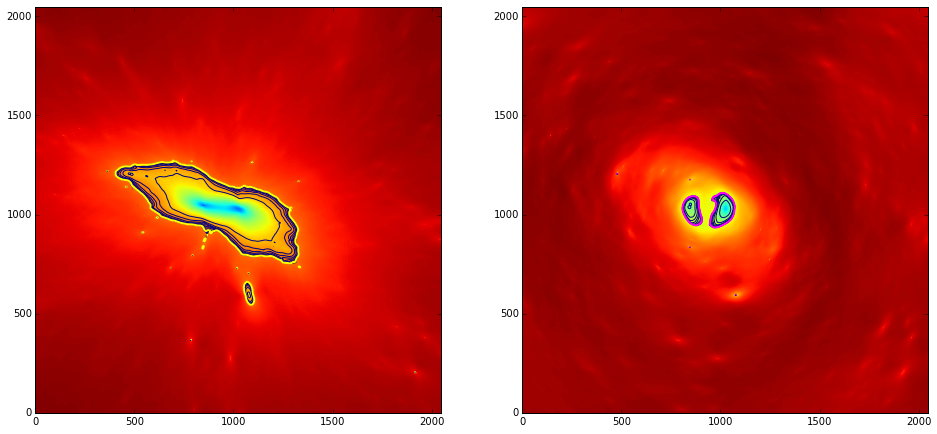

In [5]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

zl=0.5
zs=np.linspace(zl,10.0,10)
dl=cosmo.angular_diameter_distance(zl)
ds=cosmo.angular_diameter_distance(zs)
dls=[]
for i in range(ds.size):
    dls.append(cosmo.angular_diameter_distance_z1z2(zl,zs[i]).value)
    
zs_norm=9.0
ds_norm=cosmo.angular_diameter_distance(zs_norm)
dls_norm=cosmo.angular_diameter_distance_z1z2(zl,zs_norm)

fig,ax=plt.subplots(1,2,figsize=(16,8))
ax[0].imshow(lambdat,origin='lower')
ax[1].imshow(lambdar,origin='lower')
for i in range(ds.size):
    kappa_new=kappa*ds_norm.value/dls_norm.value*dls[i]/ds[i].value
    gamma_new=gamma*ds_norm.value/dls_norm.value*dls[i]/ds[i].value
    lambdat_new=(1.0-kappa_new-gamma_new)
    lambdar_new=(1.0-kappa_new+gamma_new)
    ax[0].contour(lambdat_new,levels=[0.0])
    ax[1].contour(lambdar_new,levels=[0.0])

ax[0].contour(lambdat,levels=[0.0],colors="yellow",linewidths=2)
ax[1].contour(lambdar,levels=[0.0],colors="magenta",linewidths=2)


# Caustics

The caustics are the "sources" of the critical lines. In other words, if $\vec\theta_c$ defines a set of points belonging to the critical lines, then 

$$\vec\beta_c=\vec\theta_c-\vec\alpha(\vec\theta_c)$$

defines a set of points belonging to the caustics.

To procede to the calculation of the caustics, we need first to gather the deflection angles. In the following, I will work in pixel units:

-308.049072266 276.430206299


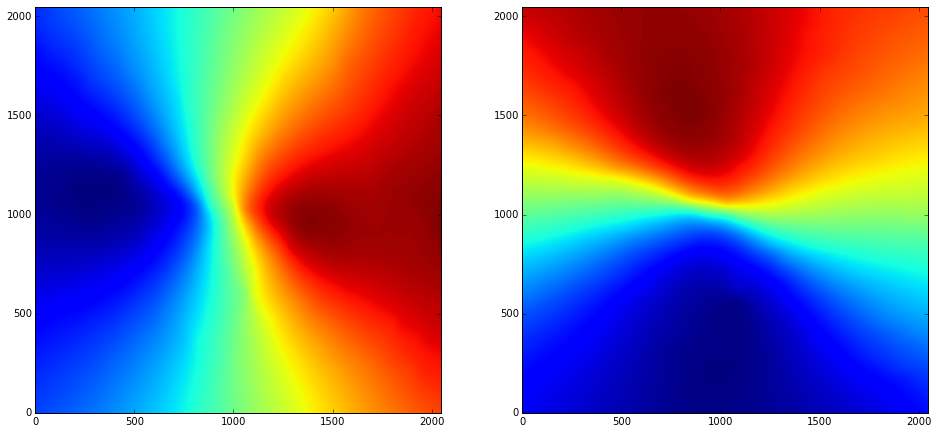

In [6]:
filealpha='/Users/massimo/stiva/FF/Hera/g0016649_G/yz_nocircles/deflAnglesHera.fits'
hdu=pyfits.open(filealpha) # read the deflection angle file

# need to do some manipulation because I wrote it only for zs=2, while this exercise will be for zs=9 
zs_norm=2.0
zs=9.0
ds_norm=cosmo.angular_diameter_distance(zs_norm)
dls_norm=cosmo.angular_diameter_distance_z1z2(zl,zs_norm)
ds=cosmo.angular_diameter_distance(zs)
dls=cosmo.angular_diameter_distance_z1z2(zl,zs)


# convert the deflection angles in pixel units
resolution=header["CDELT2"]*3600.0
alpha1=hdu[0].data/(resolution)*dls/ds*ds_norm/dls_norm
alpha2=hdu[1].data/(resolution)*dls/ds*ds_norm/dls_norm
# how big are the deflections?
print np.amin(alpha1),np.amax(alpha1)

# plot the two components
fig,ax=plt.subplots(1,2,figsize=(16,8))
ax[0].imshow(alpha1,origin='lower')
ax[1].imshow(alpha2,origin='lower')



Now that we have the deflection angle maps, we can pick up again the critical lines. We will work with the critical lines for $z_S=9$, defined above.  

In [1]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
cs=ax[0].contour(detA,levels=[0.0])

contour=cs.collections[0]
p=contour.get_paths() # p contains the paths of each individual critical line
sizevs=np.empty(len(p),dtype=int)

from scipy.ndimage import map_coordinates

if (sizevs.size > 0):
    for j in range(len(p)):
        # for each path, we create two vectors containing the x1 and x2 coordinates of the vertices
        vs = contour.get_paths()[j].vertices 
        sizevs[j]=len(vs)
        x1=[]
        x2=[]
        for i in range(len(vs)):
            xx1,xx2=vs[i]
            x1.append(float(xx1))
            x2.append(float(xx2))
        # thse are the points we want to map back on the source plane. 
        # To do that we need to evaluate the deflection angle at their positions
        # using scipy.ndimage.interpolate.map_coordinates we perform a bi-linear interpolation
        a1=map_coordinates(alpha1, [[x2],[x1]],order=1)
        a2=map_coordinates(alpha2, [[x2],[x1]],order=1)
        
        # now we can make the mapping using the lens equation:
        y1=x1-a1[0]
        y2=x2-a2[0]
        
        # plot the results!
        ax[0].plot(x1,x2,'-')
        ax[1].plot(y1,y2,'-')
        
ax[1].set_xlim([0,2048])
ax[1].set_ylim([0,2048])

NameError: name 'plt' is not defined

Left and right panels show the lens and the source planes, respectively. They display exactly the same region of the sky. 